# Example 4.2: Transmission of vibration - MDOF

In this example, we will look at the spectral density of dynamic responses in a system with multiple degrees of freedom. 

We consider the lateral response of the bridge, which is subjected to 3 wave-like forces. These forces are exerted as point loads on the columns.

<center>
<img src="figures\Bridge_3_col.svg">
</center>

### Define the system model and load



The structure has the following (mass-normalized) mode shapes (at the location of the forces):

$$
\phi_1 = [0.7, 1, 0.7]^\text{T}, \quad \phi_2 = [1.0, 0, -1.0]^\text{T}, \quad \phi_3 = [1.0, -0.3, 1.0]^\text{T}
$$

The natural frequencies in Hz are:

$$   
   f_1=0.15, \quad f_2=0.2, \quad f_3= 0.30
$$   

All modes have 2% damping.


The forces in the three degrees of freedom are uncorrelated and have the following spectral density:

$$
S(\omega) = \exp\left( - \frac{(\omega - \omega_m)^2}{0.4^2} \right)
$$

where $\omega_m$ is a parameter that defines the central frequency of the spectrum. Initially, we set $\omega_m = 1$, but its influence on the system's behaviour will later be studied by varying its value.

The cross-spectral density matrix of the load is therefore:

$$
\mathbf{S}_\mathbf{x}(\omega)
=
\left[ \begin{array}{c c c }
S(\omega) & 0 & 0 \\
0 & S(\omega) & 0 \\
0 & 0 & S(\omega) \\
\end{array} \right] 
$$


In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla


# Mode shapes
Phi_1=[0.7,1,0.7]
Phi_2=[1.0,0,-1.0]
Phi_3=[1.0,-0.3,1.0]

Phi=np.column_stack((Phi_1,Phi_2,Phi_3))

print(np.shape(Phi))

f=[0.15,0.2,0.3]  # Natural frequencies

omega_n=2*np.pi*np.array(f)

xi=[0.02,0.02,0.02] # Damping ratios

omega_axis=np.linspace(0.01,5,500) # Frequency axis

# Load spectrum
omega_m=1.0
S0=np.exp(-(omega_axis-omega_m)**2/0.4**2)

# Assign to cross-spectral density matrix o diagonal
Sx=np.zeros((3,3,len(omega_axis)))
for i in np.arange(3):
    Sx[i,i,:]=S0
        

(3, 3)


### Load cross-spectral density matrix

We first plot the cross-spectral density matrix of the load:


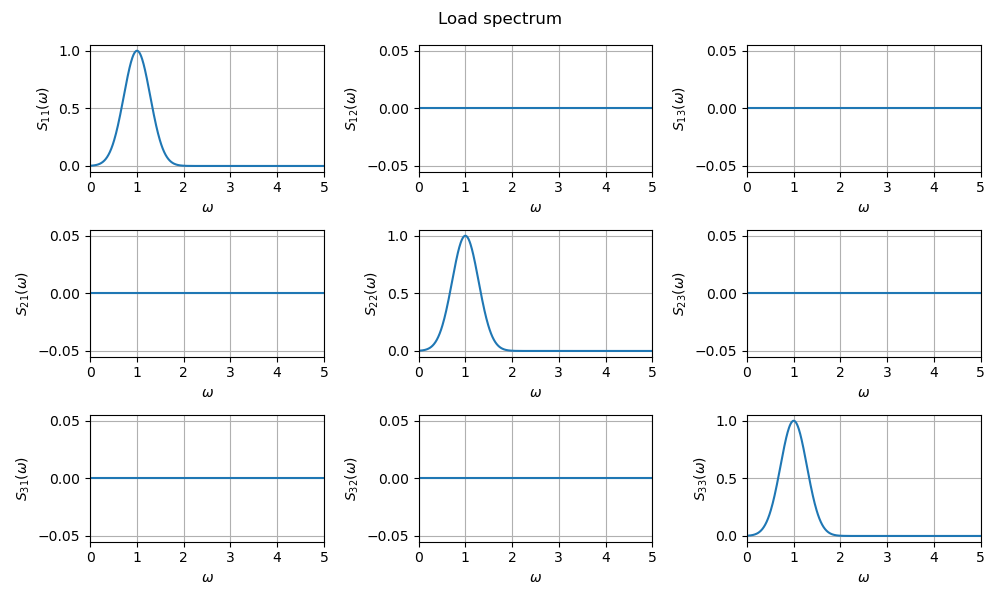

In [12]:
# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,Sx[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)
        
fig.suptitle('Load spectrum')
plt.tight_layout()

### Modal load cross-spectral density matrix

The modal load is given by $
\mathbf{\tilde{x}}(t)
=
\mathbf{\Phi}^\text{T}
\mathbf{x}(t)
$.
Therefore, the spectrum of the modal load is: 
$$
\mathbf{S}_\mathbf{\tilde{x}}(\omega)
=\mathbf{\Phi}^\text{T}
\mathbf{S}_\mathbf{x}(\omega)
\mathbf{\Phi}
$$


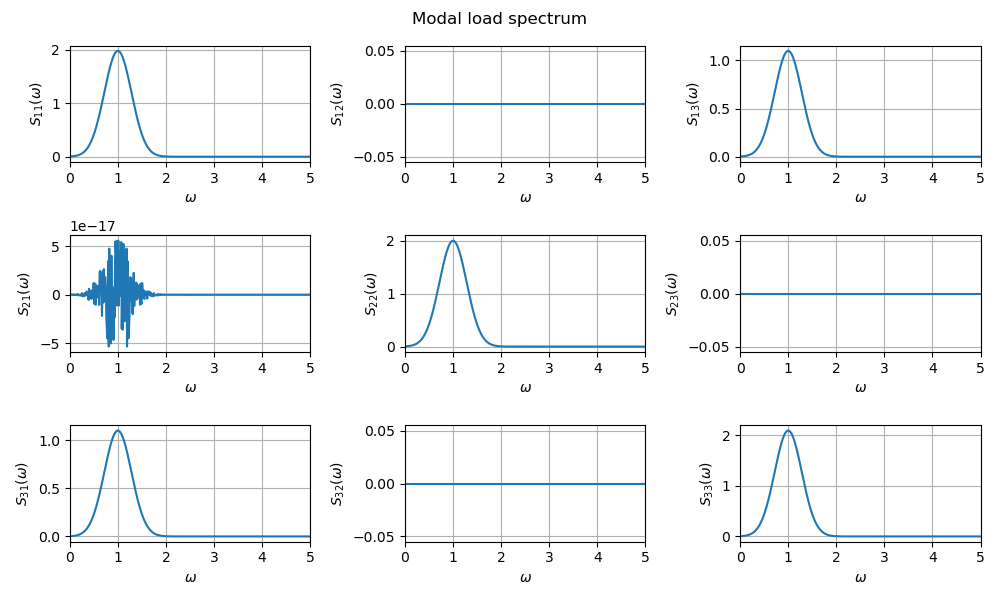

In [13]:
Sx_modal=np.zeros((3,3,len(omega_axis)))
for k in np.arange(len(omega_axis)):
    Sx_modal[:,:,k]=Phi.T @ Sx[:,:,k] @ Phi

# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,Sx_modal[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Modal load spectrum')
plt.tight_layout()


### Frequency response function

Since the mode shapes are mass normalized, the modal equation of motion can be written as follows:

$$
\mathbf{\ddot{z}}(t)+2  \cdot  \textbf{diag} (\xi)  \cdot  \textbf{diag} (\omega_n)  \cdot \mathbf{\dot{z}}(t)+ \textbf{diag} (\omega_n^2) \mathbf{z}(t)= \mathbf{\tilde{x}}(t)
$$

The modal frequency response function is therefore:

$$
\mathbf{\tilde{H}} (\omega)
=
\left[
-\omega^2 \mathbf{I}
+i \omega 2 \cdot \textbf{diag} (\xi) \cdot \textbf{diag} (\omega_n)
+ \textbf{diag} (\omega_n^2)
\right]
^{-1}
$$

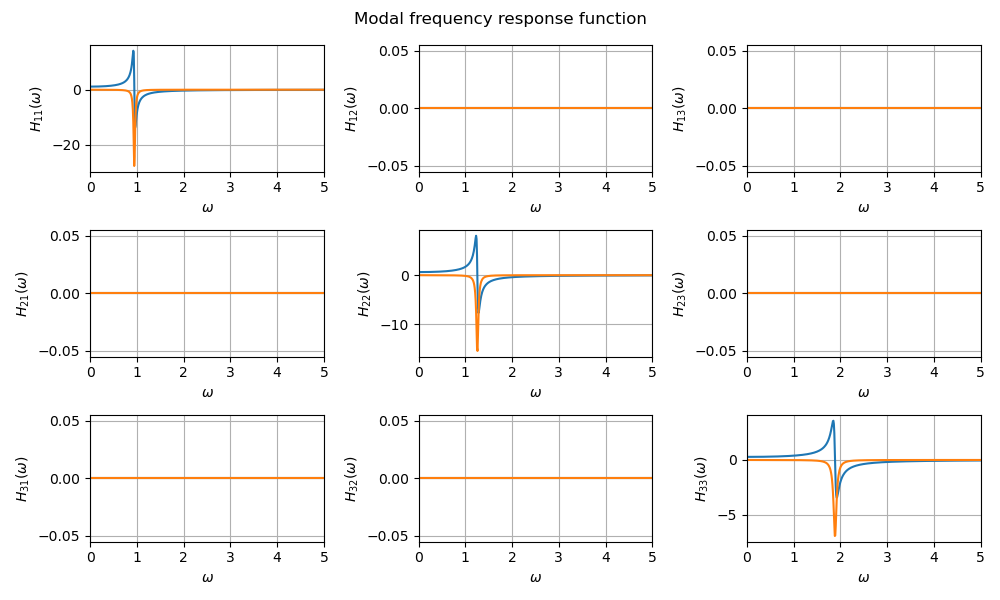

In [14]:
H_modal=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    tmp=-omega_axis[k]**2*np.eye(3)+1j*omega_axis[k]*2*np.diag(omega_n)*np.diag(xi)+np.diag(omega_n)**2
    H_modal[:,:,k]=np.linalg.inv(tmp)


# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(H_modal[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(H_modal[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        #axs[i,j].set_ylabel(r'$H_{11}$')
        axs[i,j].set_ylabel(r'$H_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Modal frequency response function')
plt.tight_layout()


### Modal response spectrum

The cross-spectral density matrix of the modal response is:

$$
\mathbf{S}_\mathbf{z}(\omega)
=
\mathbf{\tilde{H} (\omega) }
\mathbf{S}_\mathbf{\tilde{x}}(\omega)
\overline{\mathbf{\tilde{H}}} (\omega)^\text{T}
$$



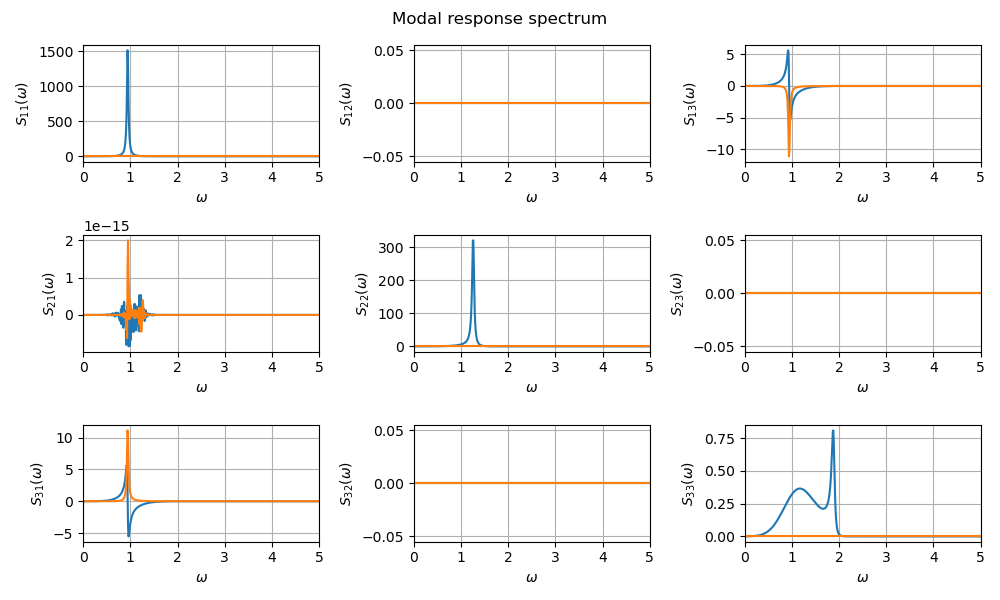

In [15]:
Sz=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sz[:,:,k]=H_modal[:,:,k] @ Sx_modal[:,:,k] @ np.conj(H_modal[:,:,k]).T

# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(Sz[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(Sz[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Modal response spectrum')
plt.tight_layout()


### Displacement response spectrum


The displacement response is given by $
\mathbf{y}(t)
=
\mathbf{\Phi}
\mathbf{z}(t)
$.
Therefore, the spectrum of the displacement response is: 
$$
\mathbf{S}_\mathbf{y}(\omega)
=\mathbf{\Phi}
\mathbf{S}_\mathbf{z}(\omega)
\mathbf{\Phi}^\text{T}
$$




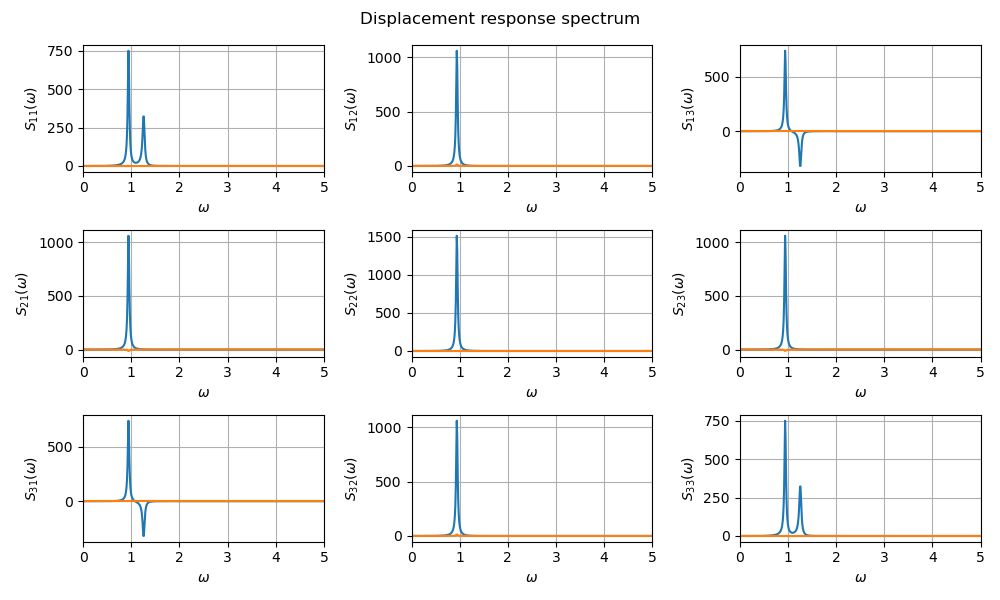

In [16]:
Sy=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sy[:,:,k]=Phi @ Sz[:,:,k] @ Phi.T

# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(Sy[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(Sy[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Displacement response spectrum')
plt.tight_layout()


### Varying the load parameters

Next, we will vary $\omega_n$ to investigate the influence of the load's frequency content.

Use the slider to adjust $\omega_n$ and observe how the response spectrum changes. You will notice a clear relationship between the frequency content of the load and its alignment with the system's natural frequencies, which significantly affects the response.


0

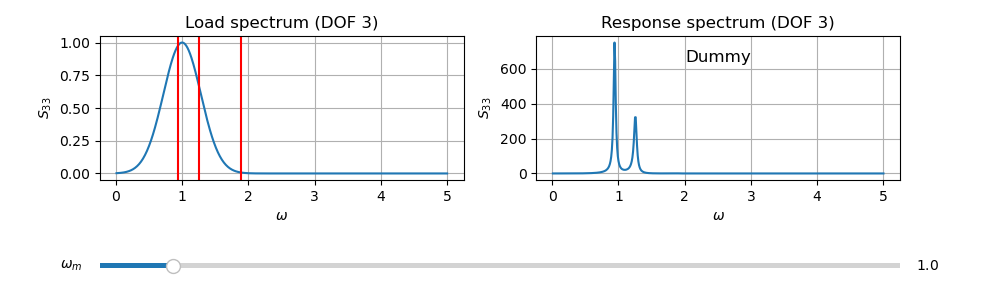

In [17]:
# Enable interactive plots in Jupyter
%matplotlib widget

from scipy.signal import welch
from matplotlib.widgets import Slider

def compute_response(parameter):
    
    omega_m = parameter
    S0 = np.exp(-(omega_axis - omega_m)**2 / 0.4**2)
    
    Sx = np.zeros((3,3,len(omega_axis)))
    for i in np.arange(3):
        Sx[i,i,:] = S0

    Sx_modal = np.zeros((3,3,len(omega_axis)))
    for k in np.arange(len(omega_axis)):
        Sx_modal[:,:,k] = Phi.T @ Sx[:,:,k] @ Phi

    Sz = np.zeros((3,3,len(omega_axis)), dtype=complex)
    for k in np.arange(len(omega_axis)):
        Sz[:,:,k] = np.conj(H_modal[:,:,k]) @ Sx_modal[:,:,k] @ H_modal[:,:,k].T

    Sy = np.zeros((3,3,len(omega_axis)), dtype=complex)
    for k in np.arange(len(omega_axis)):
        Sy[:,:,k] = Phi @ Sz[:,:,k] @ Phi.T

    # Variance of the response is the integral of the PSD
    sigma_squared = np.trapz(np.real(Sy[2,2,:]), omega_axis)
    
    return Sx, Sy, sigma_squared

# Initial load and response spectrum
initial_parameter = 1.0
Sx, Sy, sigma_squared = compute_response(initial_parameter)

# Initial plot setup
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plt.subplots_adjust(left=0.1, bottom=0.4)

# Plot the initial load PSD
dynamic_graph_load, = ax[0].plot(omega_axis, np.real(Sx[2,2,:]))
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel('$S_{33}$')
ax[0].set_title('Load spectrum (DOF 3)')
ax[0].grid(True)
ax[0].axvline(omega_n[0], color='r')
ax[0].axvline(omega_n[1], color='r')
ax[0].axvline(omega_n[2], color='r')

# Plot the initial response PSD
dynamic_graph_response, = ax[1].plot(omega_axis, np.real(Sy[2,2,:]))
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel('$S_{33}$')
ax[1].set_title('Response spectrum (DOF 3)')
ax[1].grid(True)

# Add a text to display the variance in subplot 2
variance_text = ax[1].text(0.5, 0.9, 'Dummy', transform=ax[1].transAxes,
                           fontsize=12, verticalalignment='top', horizontalalignment='center')

# Add a slider for adjusting the load PSD
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03])
slider = Slider(ax_slider, '$\omega_m$ ', 0.1, 10.0, valinit=initial_parameter)

# Update function to recompute and update the plot
def update(val):
    scale = slider.val
    Sx, Sy, sigma_squared = compute_response(scale)
    
    dynamic_graph_load.set_ydata(Sx[2,2,:])  # Update the load plot
    dynamic_graph_response.set_ydata(Sy[2,2,:])  # Update the response plot
    
    # Update the variance text
    variance_text.set_text(f'$\sigma^2$= {sigma_squared:.2f}')
    
    fig.canvas.draw_idle()  # Redraw the figure

# Connect the slider to the update function
slider.on_changed(update)
